In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import colormaps as cmaps
import pickle
from magpie_data import NeLMap2, FaradayMap2, PolarimetryMap2, InterferogramOntoAlpha

In [2]:
%cd "C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s1019_16 Faraday"

C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s1019_16 Faraday


In [3]:
R0fn='s1019_16_130012_c1.png'
R1fn='s1019_16_130008_c2.png'
B0fn='s1019_16_133916_c1.png'
B1fn='s1019_16_133912_c2.png'
S0fn='s1019_16_135417_c1.png'
S1fn='s1019_16_135413_c2.png'
s=PolarimetryMap2(R0fn, R1fn, B0fn, B1fn, S0fn, S1fn, rot_angle=-1)

<IPython.core.display.Javascript object>


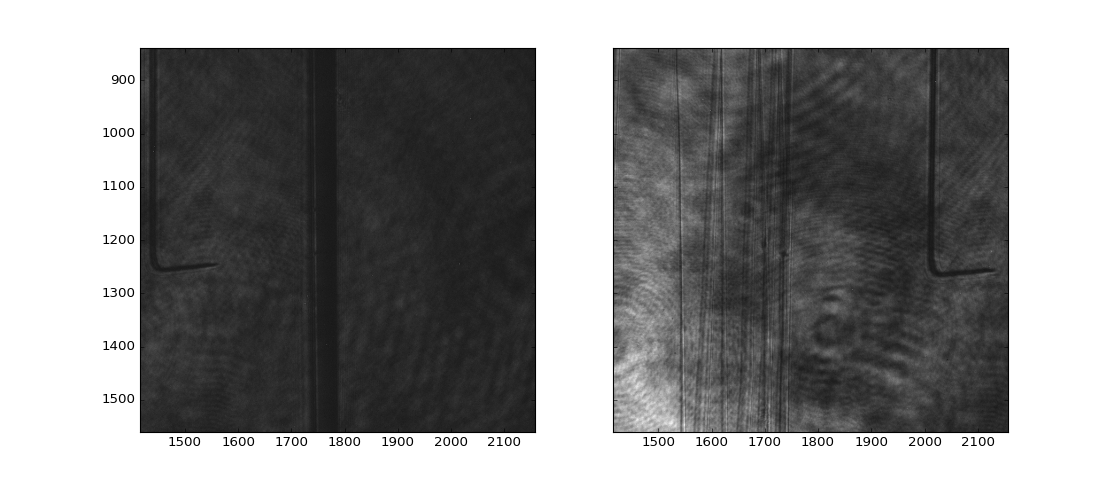

In [7]:
fig, ax=plt.subplots(1,2,sharex=True, sharey=True,figsize=(14,6))
ax[0].imshow(s.R0, clim=[0,0.1], cmap='gray')
ax[1].imshow(s.R1, clim=[0,0.1], cmap='gray')

In [8]:
constraints={'angle':(0,0.1),'scale':(1,0.1),'tx':(-600,100),'ty':(50,100)}
#t=pickle.load( open( "s0921_16 faraday registration.p", "rb" ) )

In [9]:
s.register(constraints=constraints)
s.convert_to_alpha()

C:\Users\jdavies\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
C:\Users\jdavies\Documents\magpie-analysis\magpie_data.py:124: RuntimeWarning: invalid value encountered in true_divide
  self.N0=self.S0/self.B0
C:\Users\jdavies\Documents\magpie-analysis\magpie_data.py:125: RuntimeWarning: invalid value encountered in true_divide
  self.N1=self.ST/self.BT


In [12]:
s.pickle_transform(fn=s.fn[:8]+' faraday registration.p')

<IPython.core.display.Javascript object>


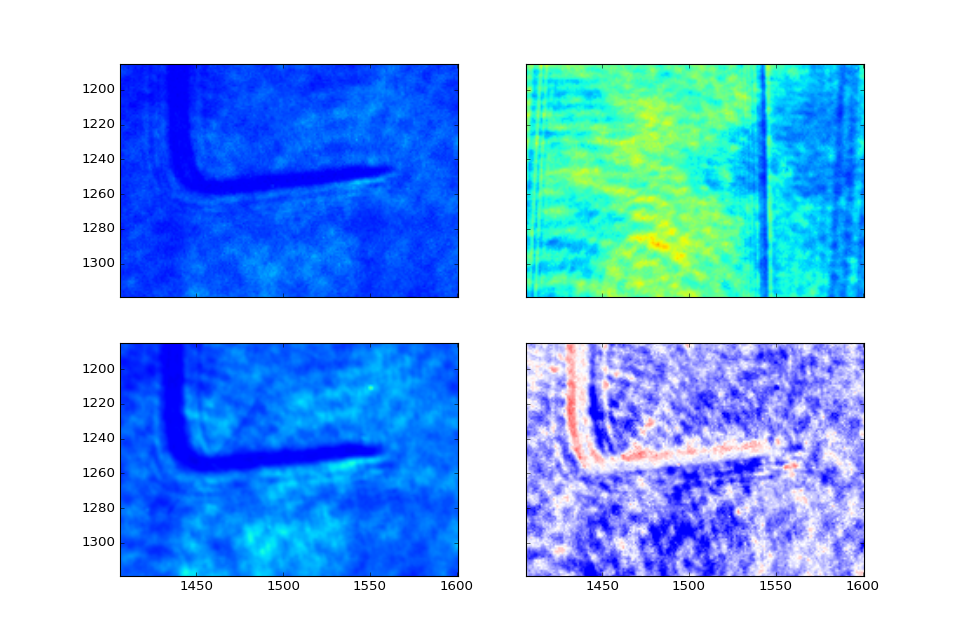

In [67]:
fig, ax=plt.subplots(2,2,sharex=True, sharey=True,figsize=(12,8))
ax[0,0].imshow(s.R0, clim=[0,0.1])
ax[0,1].imshow(s.R1, clim=[0,0.1])
ax[1,0].imshow(s.RT, clim=[0,0.1])
ax[1,1].imshow(s.R0-s.RT, clim=[-0.01,0.01], cmap='bwr')

<IPython.core.display.Javascript object>


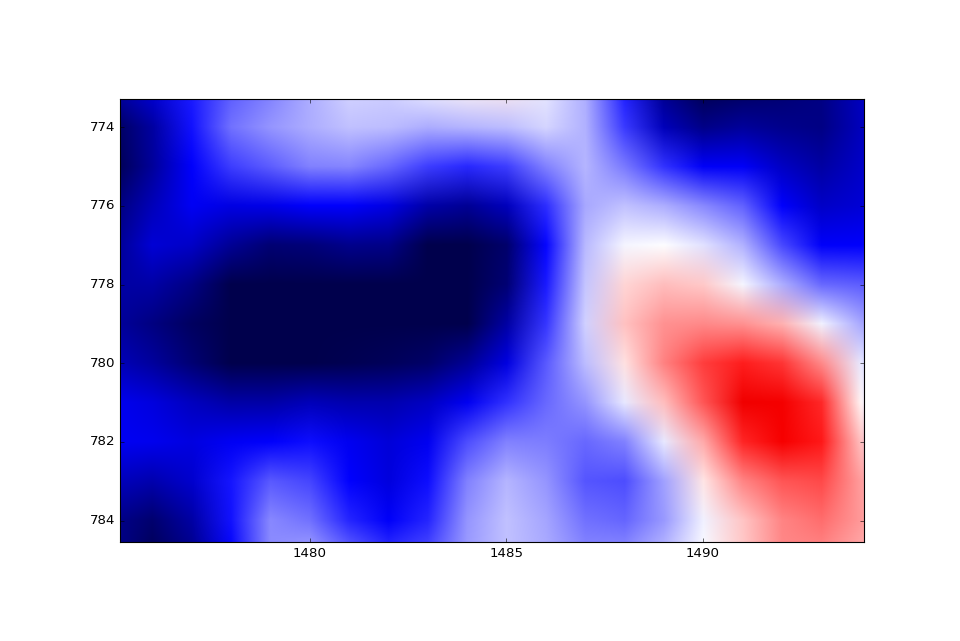

In [11]:
s.plot_data_px(clim=[-3,3])

In [15]:
s.scale=59.5
s.set_origin((1174,1760), extent=[-13,13,-20,0])

<IPython.core.display.Javascript object>


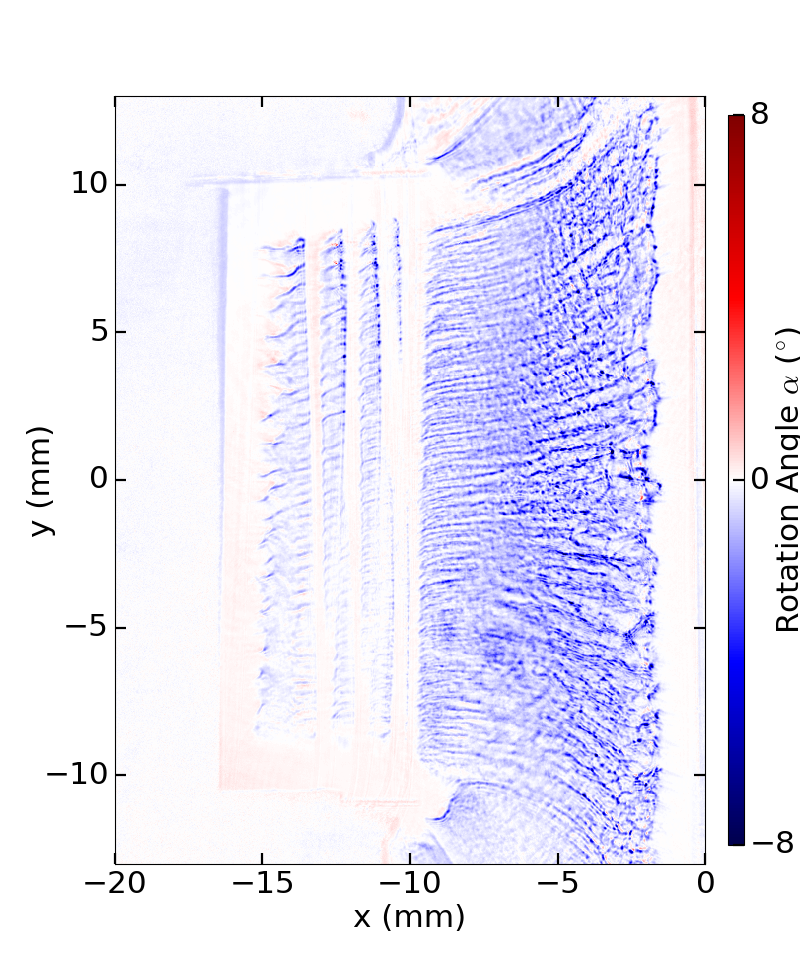

In [56]:
cm=8

fig, ax=plt.subplots(figsize=(10,12))
far=s.plot_data_mm(ax=ax, clim=[-cm,cm])

ax.set_xlabel('x (mm)',fontsize=28)
ax.set_ylabel('y (mm)',fontsize=28)

ax.set_xticks([-20,-15,-10,-5,0])
ax.set_yticks([-10,-5,0,5,10])

ax.tick_params(labelsize=28, pad=5, length=10, width=2)
ax.get_yaxis().set_label_coords(-0.1,0.5)

cbar_ax = fig.add_axes([0.91, 0.12, 0.02, 0.76])#left,bottom,width,height
cbar_ax.tick_params(labelsize=28, pad=5, length=10, width=2)
fig.colorbar(far, cax=cbar_ax, ticks=[-cm,0,cm])
cbar_ax.set_ylabel(r'Rotation Angle $\alpha$ ($^{\circ}$)',fontsize=28)

cbar_ax.get_yaxis().set_label_coords(2.9,0.5)

In [57]:
fig.savefig(s.fn[:8]+' polarogram 8deg scale.png', dpi=600, bbox_inches='tight')

<IPython.core.display.Javascript object>


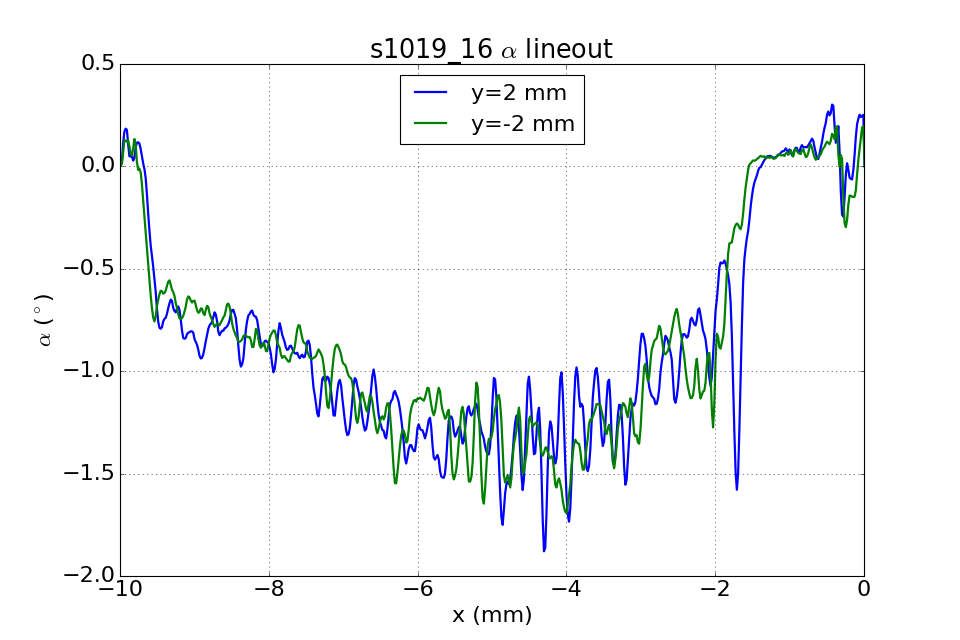

(654, 595) (654, 1190)
(892, 595) (892, 1190)


In [53]:
fig, ax=plt.subplots(figsize=(12,8))

yy=2
s.create_lineout(start=(yy,-10), end=(yy,0), lineout_width=2*s.scale)
ax.plot(s.mm-5, s.lo, label='y='+str(yy)+' mm', lw=2)

yy=-2
s.create_lineout(start=(yy,-10), end=(yy,0), lineout_width=2*s.scale)
ax.plot(s.mm-5, s.lo, label='y='+str(yy)+' mm', lw=2)


ax.set_xlim([-10,0])
ax.set_xlabel('x (mm)', fontsize=20)
#ax.set_ylim([-5,5])
ax.set_ylabel(r'$\alpha$ ($^\circ{}$)', fontsize=20)
ax.tick_params(labelsize=20)
ax.set_title(s.fn+r' $\alpha$ lineout', fontsize=23)

ax.grid(True)
ax.legend(fontsize=20, loc=9)

<IPython.core.display.Javascript object>


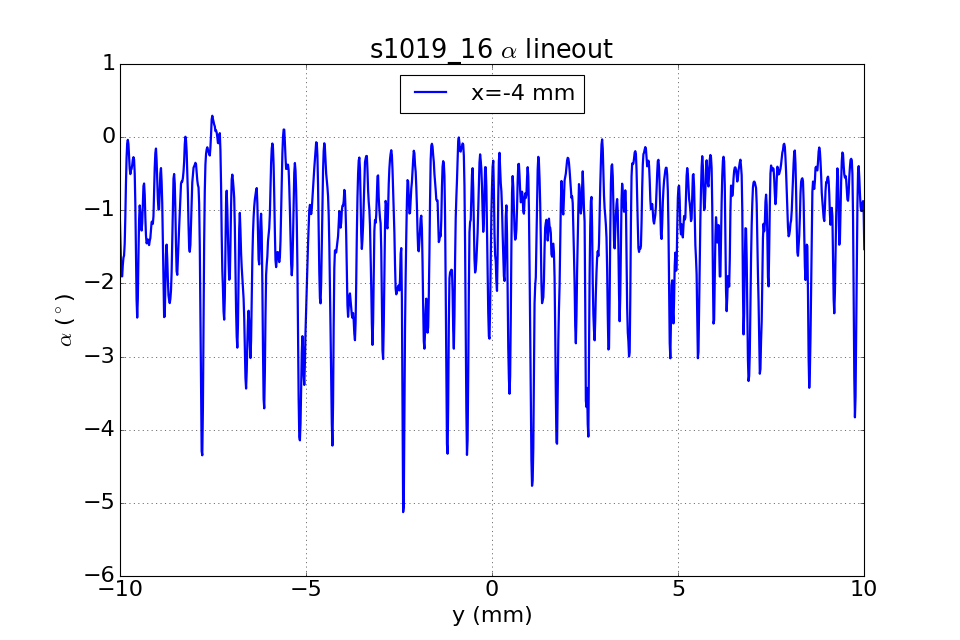

(178, 952) (1368, 952)
(178, 714) (1368, 714)


In [66]:
fig, ax=plt.subplots(figsize=(12,8))

xx=-4
s.create_lineout(start=(10,xx), end=(-10,xx), lineout_width=0.1*s.scale)
ax.plot(s.mm, s.lo, label='x='+str(xx)+' mm', lw=2)

xx=-8
s.create_lineout(start=(10,xx), end=(-10,xx), lineout_width=0.1*s.scale)
#ax.plot(s.mm, s.lo, label='x='+str(xx)+' mm', lw=2)


ax.set_xlim([-10,10])
ax.set_xlabel('y (mm)', fontsize=20)
#ax.set_ylim([-5,5])
ax.set_ylabel(r'$\alpha$ ($^\circ{}$)', fontsize=20)
ax.tick_params(labelsize=20)
ax.set_title(s.fn+r' $\alpha$ lineout', fontsize=23)

ax.grid(True)
ax.legend(fontsize=20, loc=9)

In [38]:
fig.savefig(s.fn+' alpha lineout.png', dpi=600, bbox_inches='tight')

<IPython.core.display.Javascript object>


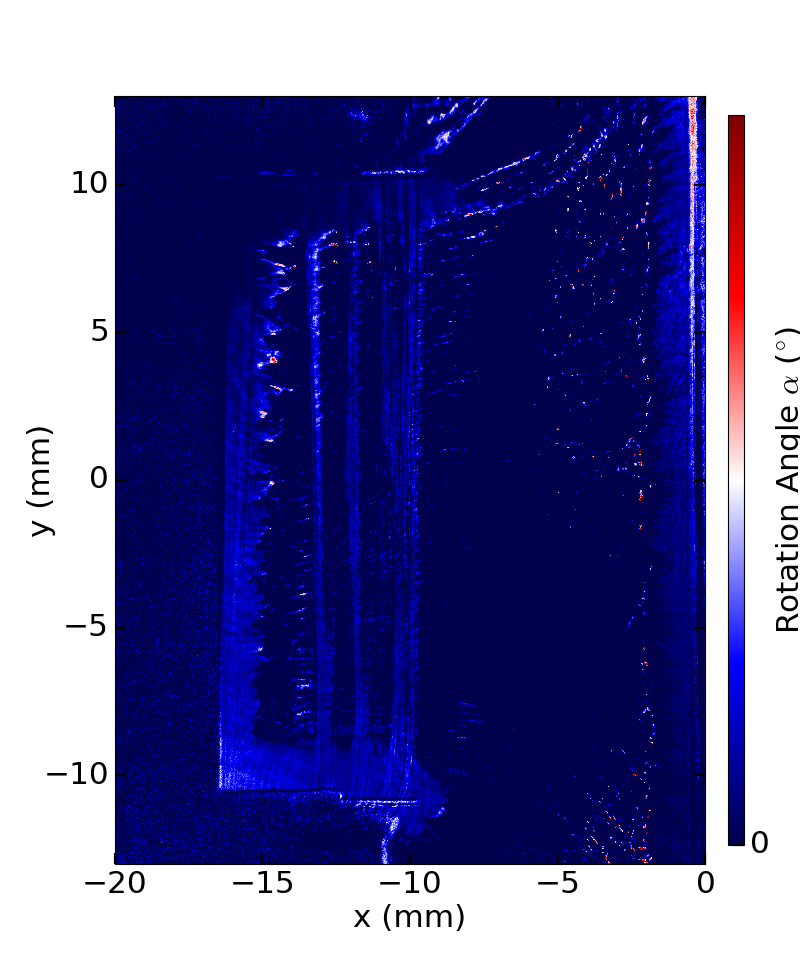

In [52]:
import copy
ss=copy.copy(s)
ss.cmap='gray'

fig, ax=plt.subplots(figsize=(10,12))
ax.imshow
far=s.plot_data_mm(ax=ax, clim=[0,1])

ax.set_xlabel('x (mm)',fontsize=28)
ax.set_ylabel('y (mm)',fontsize=28)

ax.set_xticks([-20,-15,-10,-5,0])
ax.set_yticks([-10,-5,0,5,10])

ax.tick_params(labelsize=28, pad=5, length=10, width=2)
ax.get_yaxis().set_label_coords(-0.1,0.5)

cbar_ax = fig.add_axes([0.91, 0.12, 0.02, 0.76])#left,bottom,width,height
cbar_ax.tick_params(labelsize=28, pad=5, length=10, width=2)
fig.colorbar(far, cax=cbar_ax, ticks=[-cm,0,cm])
cbar_ax.set_ylabel(r'Rotation Angle $\alpha$ ($^{\circ}$)',fontsize=28)

cbar_ax.get_yaxis().set_label_coords(2.9,0.5)

# Overlay Interferometry

In [9]:
I0fn="s0921_16 IR side on interferometry (2).JPG"
I1fn="s0921_16 IR side on interferometry (1).JPG"
IO=InterferogramOntoAlpha(s, I0fn, I1fn)

In [10]:
constraints={'angle':(0,0.1),'scale':(0.7,0.1),'ty':(0,400),'tx':(40,200)}
#t=pickle.load( open( "s0919_16 interferometry registration.p", "rb" ) )

In [11]:
IO.register(constraints=constraints)#, transform=t)

C:\Users\jdavies\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


<IPython.core.display.Javascript object>


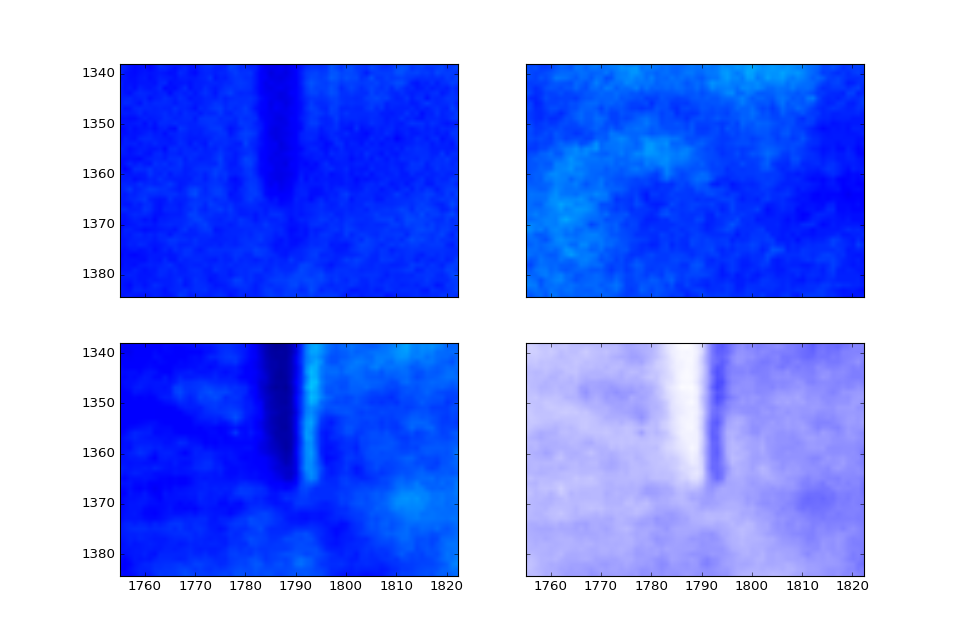

In [14]:
fig, ax=plt.subplots(2,2,sharex=True,sharey=True,figsize=(12,8))
ax[0,0].imshow(s.R0, clim=[0,0.1])
ax[0,1].imshow(IO.I0zcn, clim=[0,0.5])
ax[1,0].imshow(IO.I0T, clim=[0,0.5])
ax[1,1].imshow(s.R0-IO.I0T, clim=[-0.2,0.2], cmap='bwr')

<IPython.core.display.Javascript object>


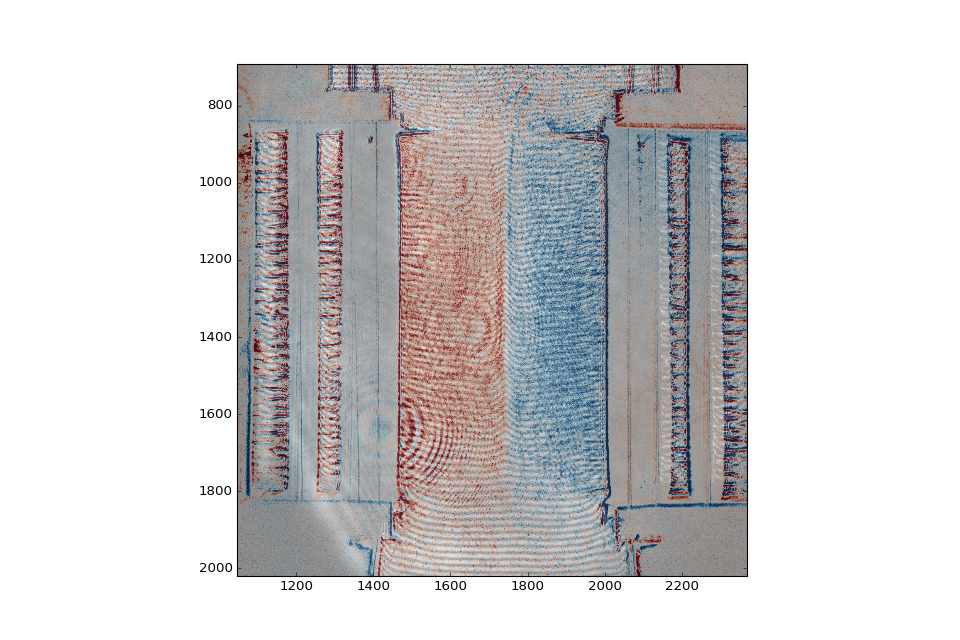

In [26]:
IO.plot_overlay_px(transparency=0.4, clim=[-0.5,0.5])

In [15]:
IO.scale=s.scale
IO.set_origin(s.origin, extent=[-13,13,-11,11])

<IPython.core.display.Javascript object>


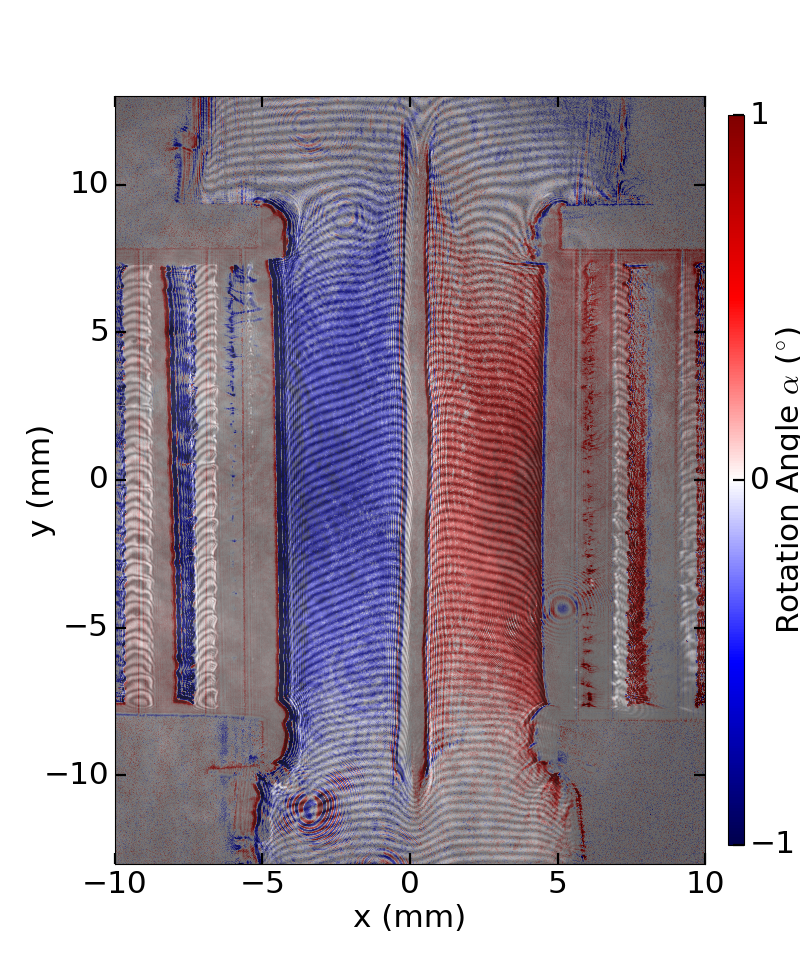

In [16]:
fig, ax=plt.subplots(figsize=(10,12))
far=s.plot_data_mm(ax=ax, clim=[-1,1])

ax.set_xlabel('x (mm)',fontsize=28)
ax.set_ylabel('y (mm)',fontsize=28)

ax.set_xticks([-10,-5,0,5,10])
ax.set_yticks([-10,-5,0,5,10])

ax.tick_params(labelsize=28, pad=5, length=10, width=2)
ax.get_yaxis().set_label_coords(-0.1,0.5)

ax.imshow(IO.data_c, cmap='gray', alpha=0.6, extent=s.extent)


cbar_ax = fig.add_axes([0.91, 0.12, 0.02, 0.76])#left,bottom,width,height
cbar_ax.tick_params(labelsize=28, pad=5, length=10, width=2)
fig.colorbar(far, cax=cbar_ax, ticks=[-1,0,1])
cbar_ax.set_ylabel(r'Rotation Angle $\alpha$ ($^{\circ}$)',fontsize=28)

cbar_ax.get_yaxis().set_label_coords(2.9,0.5)


In [17]:
fig.savefig(s.fn[:8]+' polarogram w interferometry.png', dpi=300, bbox_inches='tight')

(773, 416) (773, 773)


<IPython.core.display.Javascript object>


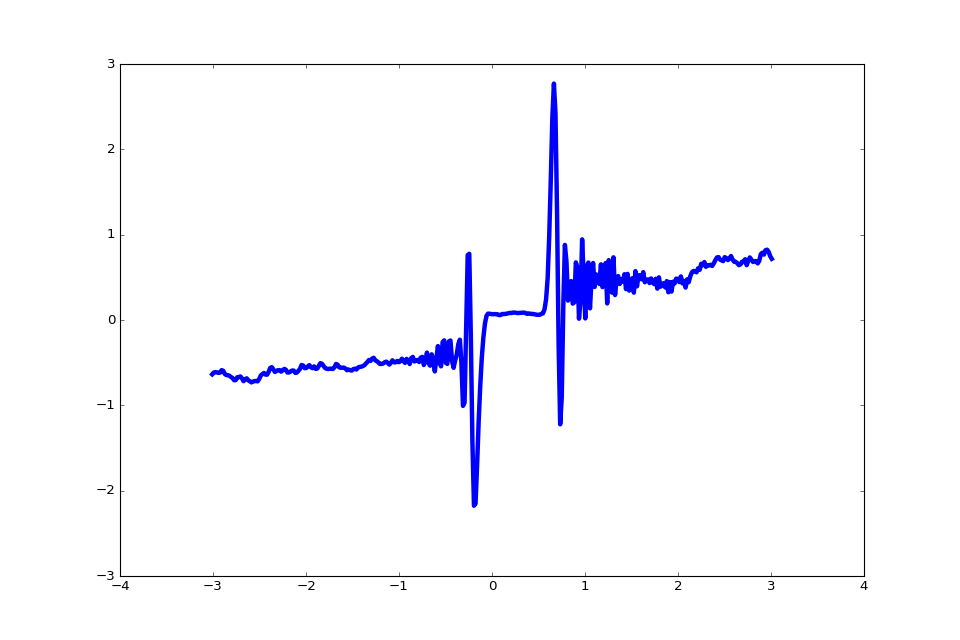

In [18]:
yy=0
s.create_lineout(start=(yy,-3), end=(yy,3), lineout_width=1*s.scale)
fig, ax=plt.subplots(figsize=(12,8))
s.plot_lineout(ax=ax, label='Data')


# Bring in The Density Map

In [11]:
I0fn="s0921_16 IR side on interferometry (2).JPG"
nefn="s0921_16 IR neL.txt"
b=FaradayMap2(s, I0fn, nefn)
constraints={'angle':(0,0.1),'scale':(0.7,0.1),'ty':(0,400),'tx':(40,200)}
t1=pickle.load( open( "s0921_16 interferometry registration.p", "rb" ) )

In [9]:
b.register(constraints=constraints, transform=t1)

C:\Users\jdavies\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
C:\Users\jdavies\Documents\magpie-analysis\magpie_data.py:194: RuntimeWarning: divide by zero encountered in true_divide
  self.data=5.99e18*self.pm.data/self.I1T
C:\Users\jdavies\Documents\magpie-analysis\magpie_data.py:194: RuntimeWarning: overflow encountered in true_divide
  self.data=5.99e18*self.pm.data/self.I1T
C:\Users\jdavies\Documents\magpie-analysis\magpie_data.py:194: RuntimeWarning: invalid value encountered in true_divide
  self.data=5.99e18*self.pm.data/self.I1T


<IPython.core.display.Javascript object>


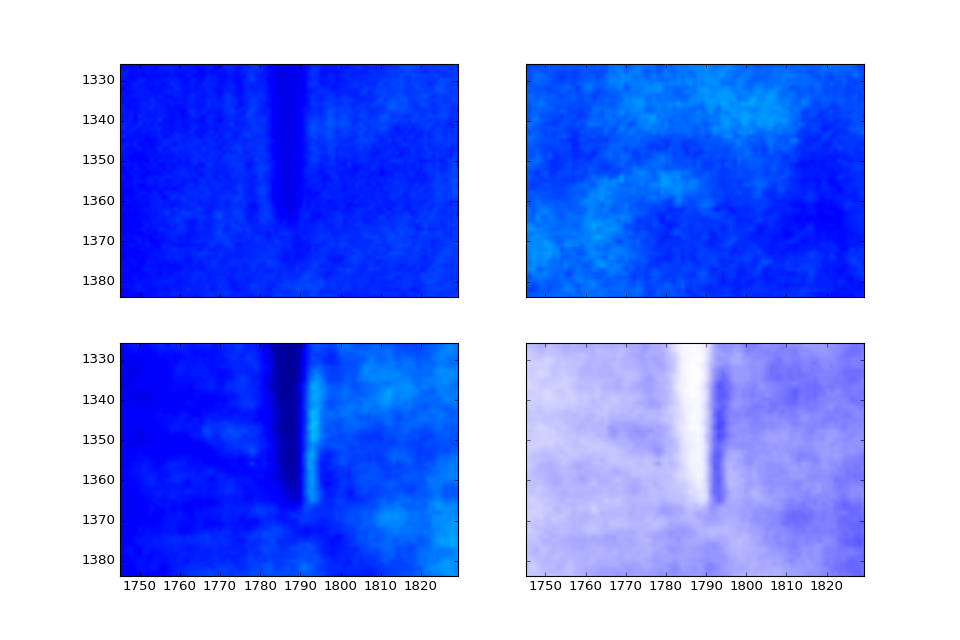

In [11]:
fig, ax=plt.subplots(2,2,sharex=True, sharey=True,figsize=(12,8))
ax[0,0].imshow(s.R0, clim=[0,0.1])
ax[0,1].imshow(b.I0zcn, clim=[0,0.5])
ax[1,0].imshow(b.I0T, clim=[0,0.5])
ax[1,1].imshow(s.R0-b.I0T, clim=[-0.2,0.2], cmap='bwr')

In [12]:
b.pickle_transform(fn=b.fn[:8]+' interferometry registration.p')

In [13]:
b.scale=s.scale
b.set_origin(s.origin, extent=[-13,13,-6,6])

<IPython.core.display.Javascript object>


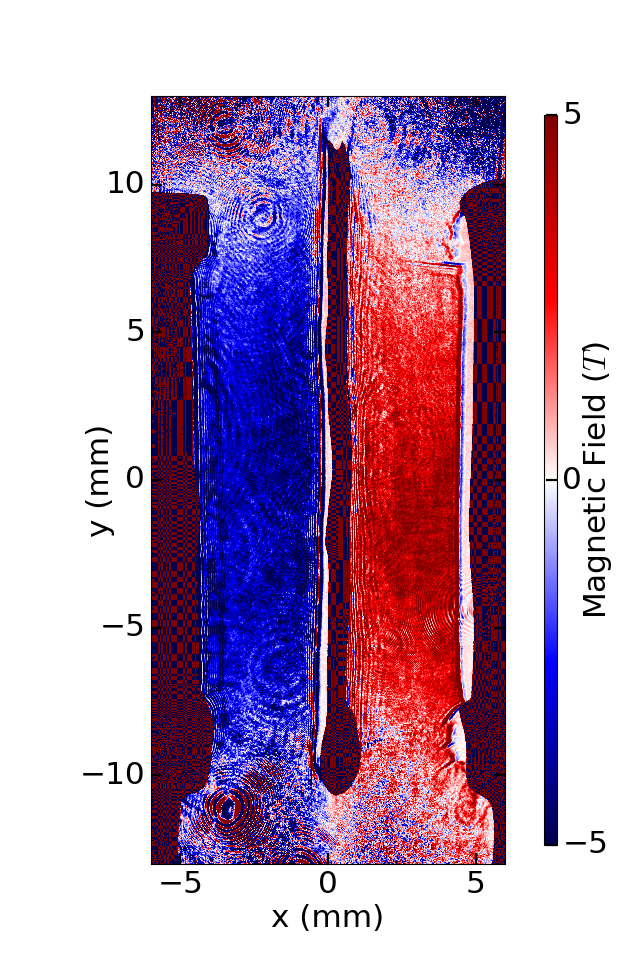

In [15]:
cm=5

fig, ax=plt.subplots(figsize=(8,12))
far=b.plot_data_mm(ax=ax, clim=[-cm,cm])
ax.set_xlabel('x (mm)',fontsize=28)
ax.set_ylabel('y (mm)',fontsize=28)

ax.set_xticks([-5,0,5])
ax.set_yticks([-10,-5,0,5,10])

ax.tick_params(labelsize=28, pad=5, length=10, width=2)
ax.get_yaxis().set_label_coords(-0.1,0.5)

cbar_ax = fig.add_axes([0.85, 0.12, 0.02, 0.76])#left,bottom,width,height
cbar_ax.tick_params(labelsize=28, pad=5, length=10, width=2)
fig.colorbar(far, cax=cbar_ax, ticks=[-cm,0,cm])
cbar_ax.set_ylabel(r'Magnetic Field ($T$)',fontsize=28)

cbar_ax.get_yaxis().set_label_coords(2.9,0.5)

In [31]:
fig.savefig('s0914_16 B field.png', dpi=300, bbox_inches='tight')

<IPython.core.display.Javascript object>


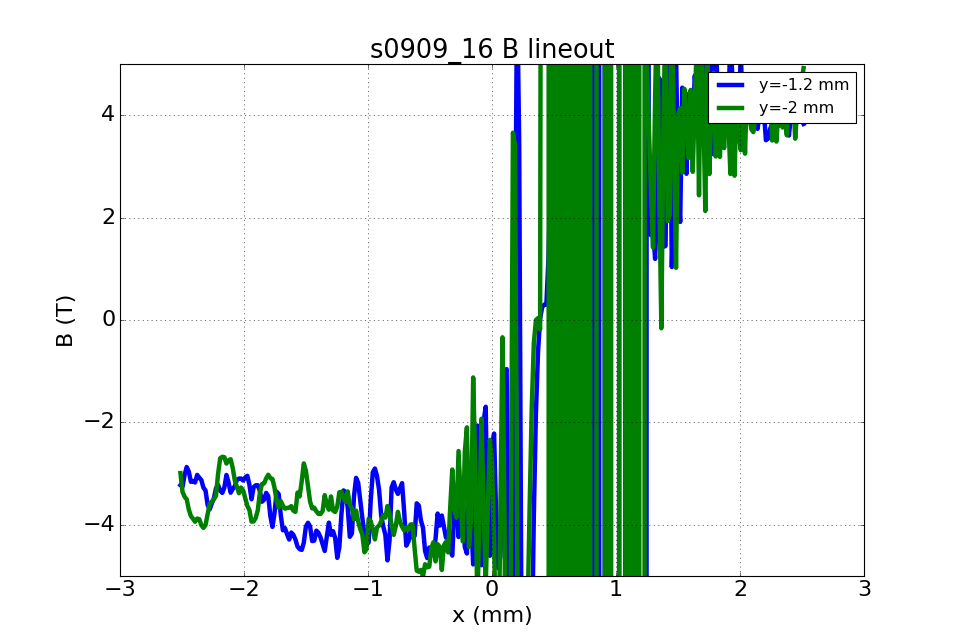

(844, 178) (844, 476)
(892, 178) (892, 476)


In [17]:
fig, ax=plt.subplots(figsize=(12,8))

yy=-1.2
b.create_lineout(start=(yy,-3), end=(yy,2), lineout_width=0.5*s.scale)
b.plot_lineout(ax=ax, label='y=-1.2 mm')

yy=-2
b.create_lineout(start=(yy,-3), end=(yy,2), lineout_width=0.5*s.scale)
b.plot_lineout(ax=ax, label='y=-2 mm')


ax.set_xlim([-3,3])
ax.set_xlabel('x (mm)', fontsize=20)
ax.set_ylim([-5,5])
ax.set_ylabel('B (T)', fontsize=20)
ax.tick_params(labelsize=20)
ax.set_title('s0909_16 B lineout', fontsize=23)

ax.grid(True)
ax.legend()

In [39]:
fig.savefig('s0914_16 B field lineouts.png', dpi=300, bbox_inches='tight')

In [33]:
print(res.fit_report())

[[Model]]
    Model(Harris)
[[Fit Statistics]]
    # function evals   = 73
    # data points      = 358
    # variables        = 4
    chi-square         = 24.304
    reduced chi-square = 0.069
[[Variables]]
    B0:   1.62427779 +/- 0.016439 (1.01%) (init= 4)
    x0:   0.12724265 +/- 0.012858 (10.11%) (init= 0)
    L:    0.40200258 +/- 0.022350 (5.56%) (init= 0.25)
    C:    0.18172526 +/- 0.015505 (8.53%) (init= 0)
[[Correlations]] (unreported correlations are <  0.100)
    C(x0, C)                     =  0.448 
    C(B0, L)                     =  0.423 



In [40]:
fig.savefig('s0909_16 B field lineout.png', dpi=300, bbox_inches='tight')

# End on Interferometry

In [2]:
cd "~\Google Drive\MAGPIE\data\2016\s1019_16 W into Cu target"

C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s1019_16 W into Cu target


In [36]:
s1019_16_532=NeLMap2('s1019_16 532nm neL.txt', scale=173, rot_angle=90)

<IPython.core.display.Javascript object>


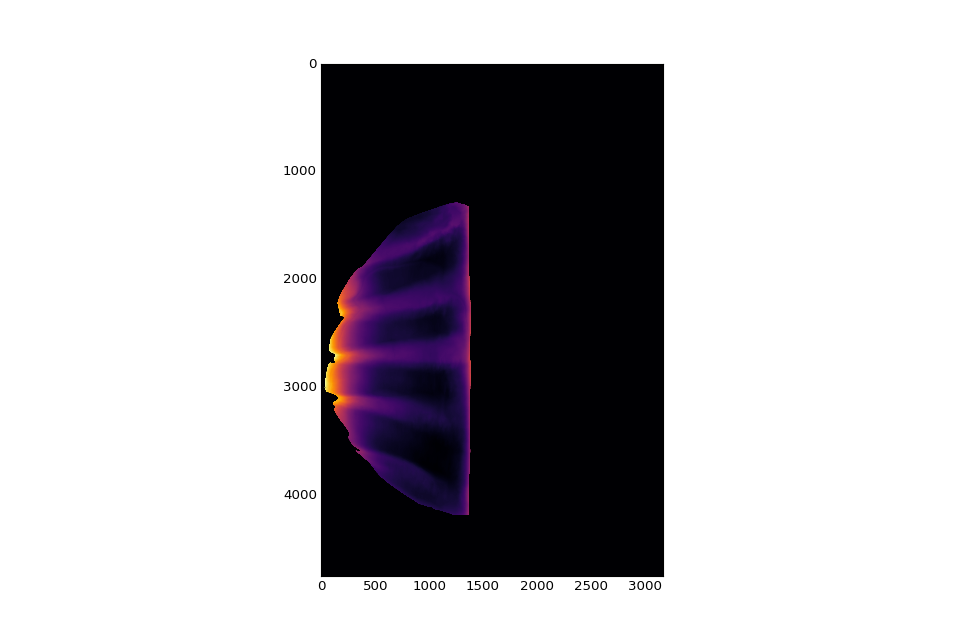

In [105]:
s=s1019_16_532
s.plot_data_px()

In [94]:
s.set_origin(origin=(2748,1586), extent=[-9,9,-9,0])

<IPython.core.display.Javascript object>


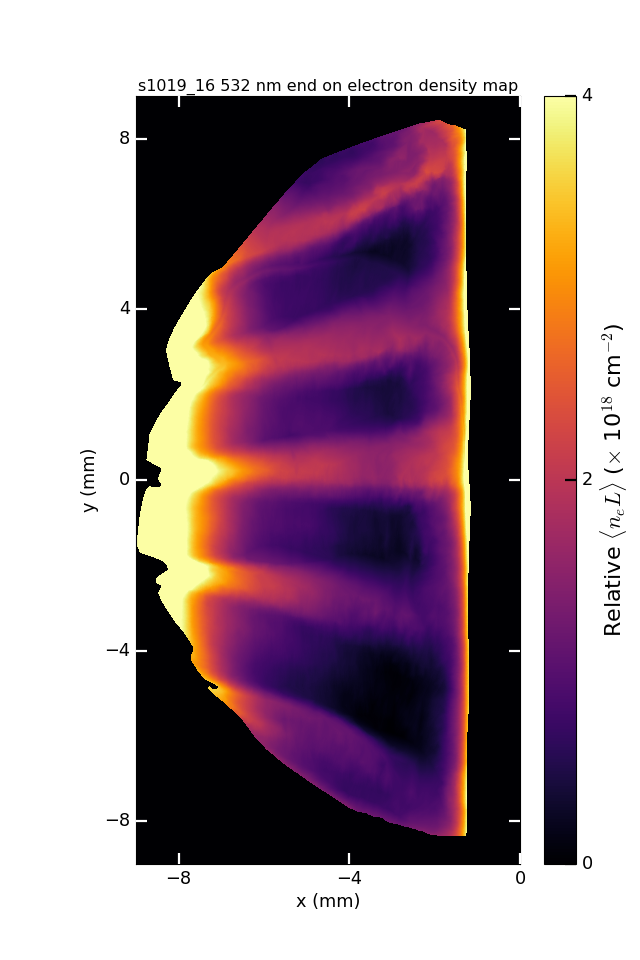

In [108]:
fig,ax=plt.subplots(figsize=(8,12))
im=s.plot_data_mm(ax=ax, multiply_by=1/1e18, clim=[0,4])
ax.set_xlabel('x (mm)',fontsize=16)
ax.set_ylabel('y (mm)',fontsize=16)
ax.set_xticks([-8,-4,0])
ax.set_yticks([-8,-4,0,4,8])

ax.tick_params(labelsize=16, pad=5, length=10, width=2, color='white')

cbar_ax = fig.add_axes([0.85, 0.1, 0.05, 0.8])#l,b,w,h
fig.colorbar(im, cax=cbar_ax, ticks=[0,2,4])
cbar_ax.tick_params(labelsize=16, pad=5, length=10, width=2)
cbar_ax.set_ylabel(r'Relative $\langle n_eL \rangle $ ($\times$ 10$^{18}$ cm$^{-2}$)',fontsize=20)

ax.set_title(s.fn+ ' 532 nm end on electron density map')

In [109]:
fig.savefig(s.fn+' 532 nm neL.png', dpi=300)

In [88]:
s1019_16_355=NeLMap2('s1019_16 355nm neL.txt', scale=128, rot_angle=90, flip_lr=True)

<IPython.core.display.Javascript object>


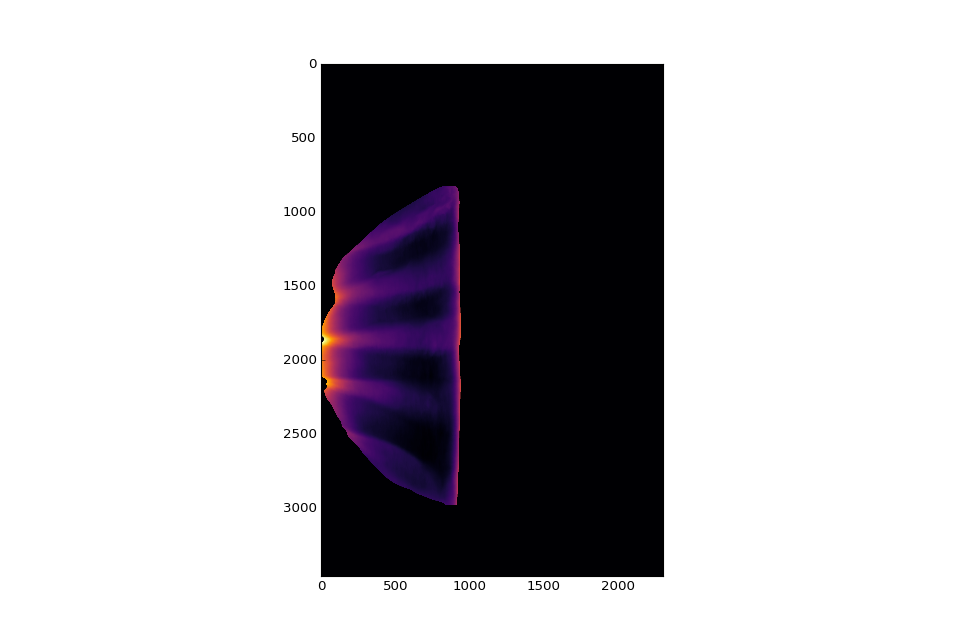

In [110]:
s=s1019_16_355
s.plot_data_px()

In [102]:
s.set_origin(origin=(1914,1107), extent=[-9,9,-8.5,0])

<IPython.core.display.Javascript object>


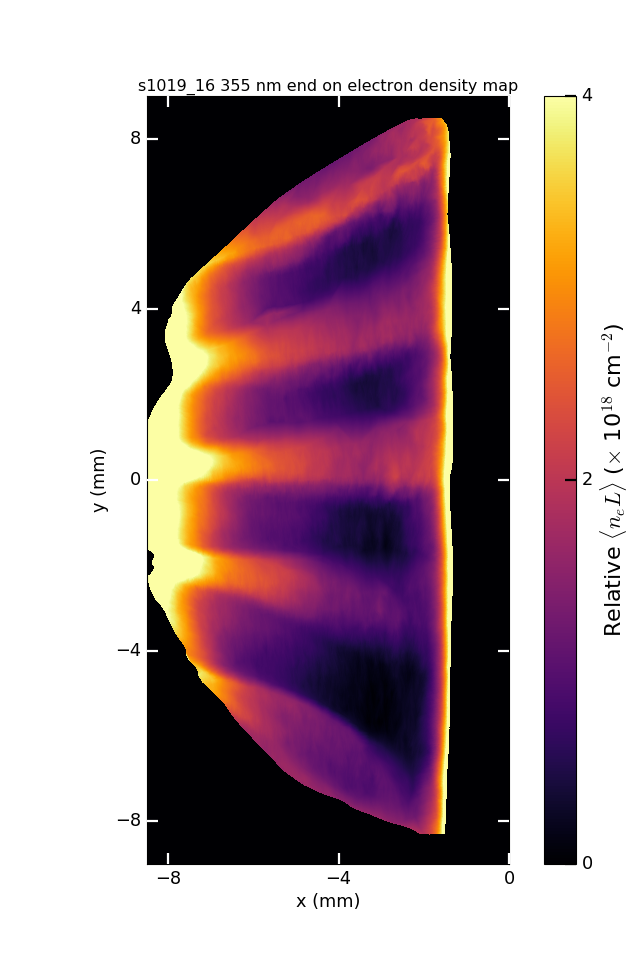

In [111]:
fig,ax=plt.subplots(figsize=(8,12))
im=s.plot_data_mm(ax=ax, multiply_by=1/1e18, clim=[0,4])
ax.set_xlabel('x (mm)',fontsize=16)
ax.set_ylabel('y (mm)',fontsize=16)
ax.set_xticks([-8,-4,0])
ax.set_yticks([-8,-4,0,4,8])

ax.tick_params(labelsize=16, pad=5, length=10, width=2, color='white')

cbar_ax = fig.add_axes([0.85, 0.1, 0.05, 0.8])#l,b,w,h
fig.colorbar(im, cax=cbar_ax, ticks=[0,2,4])
cbar_ax.tick_params(labelsize=16, pad=5, length=10, width=2)
cbar_ax.set_ylabel(r'Relative $\langle n_eL \rangle $ ($\times$ 10$^{18}$ cm$^{-2}$)',fontsize=20)
ax.set_title(s.fn+ ' 355 nm end on electron density map')

In [119]:
fig.savefig(ax.title.get_text()+'.png', dpi=300)

In [118]:
ax.title.get_text()

's1019_16 355 nm end on electron density map'